In [10]:
%matplotlib inline
import numpy as np 
import scipy.special as sp
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import numpy.random as rnd 
#import math 

# Day 3: Exercises I, II, III

In [8]:
dim = 4

# Generate a random matrix using a normal distribution (dim x dim)
A = np.random.rand(dim, dim)
# Generate from A a symmetric positive define matrix
A = A.dot(A.T)
# Diagonalize the matrix
diagonalize = np.linalg.eigh(A)

eigvalues = diagonalize[0]
eigvectors = diagonalize[1]

# Invert the matrix A (it will be useful later)
invA = np.linalg.inv(A)

sigma = [ np.sqrt(1./eigvals) for eigvals in eigvalues]

#print eigvectors
#print eigvectors[:,0]
#print A.dot(eigvectors[:,0])/eigvectors[:,0]

In [9]:
def do_experiments(num_experiments):
    list_mrndv = []
    for i in range(num_experiments):
        q = [ np.random.normal(0, std) for std in sigma ]
        x = eigvectors.dot(q)
        list_mrndv.append(x)
    return list_mrndv

num_exps = 10000
our_sample = do_experiments(num_exps)

def x(i):
    ret = [our_sample[k][i] for k in range(num_exps)]
    return ret


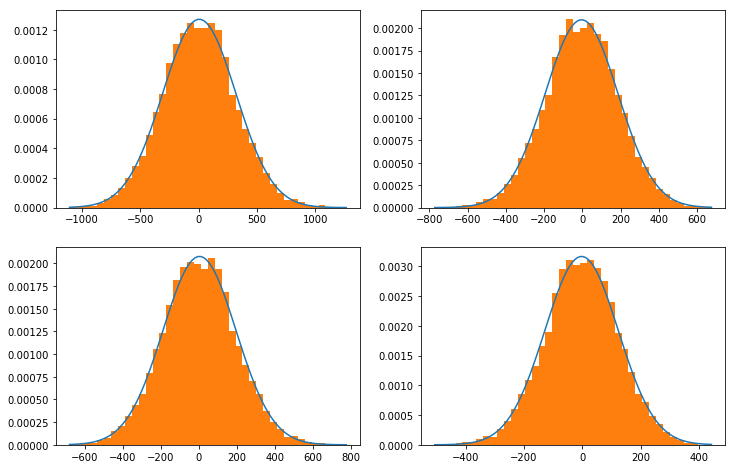

In [7]:
x0 = np.linspace(min(x(0)), max(x(0)), 100)
x1 = np.linspace(min(x(1)), max(x(1)), 100)
x2 = np.linspace(min(x(2)), max(x(2)), 100)
x3 = np.linspace(min(x(3)), max(x(3)), 100)
#plt.plot(xx, mlab.normpdf(xx, np.mean(x(0)), np.std(x(0))))

set_hist = 40

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(x0, mlab.normpdf(x0, np.mean(x(0)), np.std(x(0))))
plt.hist(x(0), set_hist, normed=1)
plt.subplot(222)
plt.plot(x1, mlab.normpdf(x1, np.mean(x(1)), np.std(x(1))))
plt.hist(x(1), set_hist, normed=1)
plt.subplot(223)
plt.plot(x2, mlab.normpdf(x2, np.mean(x(2)), np.std(x(2))))
plt.hist(x(2), set_hist, normed=1)
plt.subplot(224)
plt.plot(x3, mlab.normpdf(x3, np.mean(x(3)), np.std(x(3))))
plt.hist(x(3), set_hist, normed=1)
#plt.hist(x(2), 20, normed=1)
plt.show()

In [8]:
# Some Checks
print "m: ", np.mean(x(0)), np.mean(x(1)), np.mean(x(2)), np.mean(x(3))
print "v: ", np.var(x(0)), np.var(x(1)), np.var(x(2)), np.var(x(3))
print "-------------------"
print "c: ",invA[0,0], invA[1,1], invA[2,2], invA[3,3]

m:  0.0186111090747 -0.0300843791131 0.025173414177 -0.00355743646394
v:  66.2895270126 93.1900116867 437.903191327 128.636848729
-------------------
c:  67.2342838482 94.2363581107 444.337063502 130.497180847


In [10]:
# Run the K-S test

from scipy import stats

my_norm = []
for i in range(dim):
    my_norm.append(stats.norm(loc=0, scale=np.std(x(i))))
    
for i in range(dim):
    print stats.kstest(x(i), my_norm[i].cdf)


KstestResult(statistic=0.0057670100517335232, pvalue=0.89354895313738569)
KstestResult(statistic=0.0073455485635516293, pvalue=0.6532040279981246)
KstestResult(statistic=0.0062949773664319197, pvalue=0.82298691209179675)
KstestResult(statistic=0.0062923367371536254, pvalue=0.82337485720169257)


In [19]:
# Let us now compute <X0 X1 X2 X3>

def correlator_th(matrix,i,j,k,l):
    ret = matrix[0,1]*matrix[2,3] + matrix[0,2]*matrix[1,3] + matrix[0,3]*matrix[2,1]
    return ret

def correlator_sp(sample,i,j,k,l):
    ret = np.mean(sample[:,i]*sample[:,j]*sample[:,k]*sample[:,l])
    return ret

array_mrndv = np.array(list_mrndv)

print correlator_th(invA,0,1,2,3)
print correlator_sp(array_mrndv,0,1,2,3)

-51568.5577619
-49995.9984188
